In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PREDHS = pd.read_csv("datos/DHS_DATA.csv")

# Exploración Inicial de los Datos 🔎
Para analizar la información de mi dataset, su tamaño y las columnas. 

In [16]:
PREDHS.info()
PREDHS.shape
PREDHS.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISO3                    138 non-null    object 
 1   DataId                  138 non-null    object 
 2   Indicator               138 non-null    object 
 3   Value                   138 non-null    object 
 4   Precision               138 non-null    object 
 5   DHS_CountryCode         137 non-null    object 
 6   CountryName             138 non-null    object 
 7   SurveyYear              138 non-null    object 
 8   SurveyId                138 non-null    object 
 9   IndicatorId             138 non-null    object 
 10  IndicatorOrder          137 non-null    float64
 11  IndicatorType           137 non-null    object 
 12  CharacteristicId        137 non-null    float64
 13  CharacteristicOrder     137 non-null    float64
 14  CharacteristicCategory  137 non-null    ob

Index(['ISO3', 'DataId', 'Indicator', 'Value', 'Precision', 'DHS_CountryCode',
       'CountryName', 'SurveyYear', 'SurveyId', 'IndicatorId',
       'IndicatorOrder', 'IndicatorType', 'CharacteristicId',
       'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel',
       'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID',
       'RegionId', 'SurveyYearLabel', 'SurveyType', 'DenominatorWeighted',
       'DenominatorUnweighted', 'CILow', 'CIHigh', 'LevelRank'],
      dtype='object')

In [17]:
PREDHS.head(5)

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COL,78894,Total fertility rate 15-49,3.2,1,CO,Colombia,1986,CO1986DHS,FE_FRTR_W_TFR,...,1.0,FEFRTRWTFR,NaN,1986.0,DHS,NaN,NaN,NaN,NaN,NaN
2,COL,78758,Married women currently using any method of co...,64.8,1,CO,Colombia,1986,CO1986DHS,FP_CUSM_W_ANY,...,1.0,FPCUSMWANY,NaN,1986.0,DHS,2850.0,2848.0,NaN,NaN,NaN
3,COL,78759,Married women currently using any modern metho...,52.4,1,CO,Colombia,1986,CO1986DHS,FP_CUSM_W_MOD,...,1.0,FPCUSMWMOD,NaN,1986.0,DHS,2850.0,2848.0,NaN,NaN,NaN
4,COL,79065,Median age at first marriage [Women]: 25-49,20.8,1,CO,Colombia,1986,CO1986DHS,MA_AAFM_W_M2B,...,1.0,MAAAFMWM2B,NaN,1986.0,DHS,NaN,NaN,NaN,NaN,NaN


### Buscando valores nulos

In [18]:
PREDHS.isnull().sum()

ISO3                        0
DataId                      0
Indicator                   0
Value                       0
Precision                   0
DHS_CountryCode             1
CountryName                 0
SurveyYear                  0
SurveyId                    0
IndicatorId                 0
IndicatorOrder              1
IndicatorType               1
CharacteristicId            1
CharacteristicOrder         1
CharacteristicCategory      1
CharacteristicLabel         1
ByVariableId                0
ByVariableLabel            78
IsTotal                     1
IsPreferred                 1
SDRID                       1
RegionId                  138
SurveyYearLabel             1
SurveyType                  1
DenominatorWeighted        56
DenominatorUnweighted      56
CILow                     109
CIHigh                    109
LevelRank                 138
dtype: int64

Para conocer el porcentaje de valores nulos por columna. 

In [19]:
nvalorespct = PREDHS.isnull().mean() * 100
nvalorespct

ISO3                        0.000000
DataId                      0.000000
Indicator                   0.000000
Value                       0.000000
Precision                   0.000000
DHS_CountryCode             0.724638
CountryName                 0.000000
SurveyYear                  0.000000
SurveyId                    0.000000
IndicatorId                 0.000000
IndicatorOrder              0.724638
IndicatorType               0.724638
CharacteristicId            0.724638
CharacteristicOrder         0.724638
CharacteristicCategory      0.724638
CharacteristicLabel         0.724638
ByVariableId                0.000000
ByVariableLabel            56.521739
IsTotal                     0.724638
IsPreferred                 0.724638
SDRID                       0.724638
RegionId                  100.000000
SurveyYearLabel             0.724638
SurveyType                  0.724638
DenominatorWeighted        40.579710
DenominatorUnweighted      40.579710
CILow                      78.985507
C

## Limpieza de Datos 🧹
**Problemas Identificados:**
1. Columnas con demasiados valores nulos:
- **RegionId y LevelRank:** tienen 100% de valores nulos, los eliminaré ya que no aportan ninguna información relevante.
- **ByVariableLabel**: tiene 56.52% de valores nulos. 
- **DenominatorWeighted y DenominatorUnweighted:** tienen 40.58% de valores nulos.
-  **CILow y CIHigh:** tienen 78.99% de valores nulos.
- **DHS_CountryCode, IndicatorOrder, IndicatorType, CharacteristicId, CharacteristicOrder:** tienen valores nulos en menos del 1%, los voy a inputar. 

In [20]:
# Restablecer el index
PREDHS.drop(index=0, inplace=True)

In [21]:
# Eliminando columnas con valores nulos y columnas que no aportan a mi analisis 
DHS = PREDHS.drop(columns=["RegionId", "LevelRank", "SurveyId", "IndicatorId", "IndicatorOrder"])
DHS.head(5)

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,IndicatorType,CharacteristicId,...,ByVariableLabel,IsTotal,IsPreferred,SDRID,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh
1,COL,78894,Total fertility rate 15-49,3.2,1,CO,Colombia,1986,I,1000.0,...,NaN,1.0,1.0,FEFRTRWTFR,1986.0,DHS,NaN,NaN,NaN,NaN
2,COL,78758,Married women currently using any method of co...,64.8,1,CO,Colombia,1986,I,1000.0,...,NaN,1.0,1.0,FPCUSMWANY,1986.0,DHS,2850.0,2848.0,NaN,NaN
3,COL,78759,Married women currently using any modern metho...,52.4,1,CO,Colombia,1986,I,1000.0,...,NaN,1.0,1.0,FPCUSMWMOD,1986.0,DHS,2850.0,2848.0,NaN,NaN
4,COL,79065,Median age at first marriage [Women]: 25-49,20.8,1,CO,Colombia,1986,I,1000.0,...,NaN,1.0,1.0,MAAAFMWM2B,1986.0,DHS,NaN,NaN,NaN,NaN
5,COL,260599,Infant mortality rate,32,0,CO,Colombia,1986,I,1000.0,...,Five years preceding the survey,1.0,1.0,CMECMRCIMR,1986.0,DHS,NaN,NaN,25.0,40.0


## Analisis

In [22]:
indicadores = DHS["Indicator"].unique()
indicadores

array(['Total fertility rate 15-49',
       'Married women currently using any method of contraception',
       'Married women currently using any modern method of contraception',
       'Median age at first marriage [Women]: 25-49',
       'Infant mortality rate', 'Under-five mortality rate',
       'Fully vaccinated (8 basic antigens)',
       'Median duration of exclusive breastfeeding',
       'Unmet need for family planning',
       'Demand for family planning satisfied by modern methods',
       'Median age at first sexual intercourse [Women]: 25-49',
       'Place of delivery: Health facility',
       'Treatment of diarrhea: Either ORS or RHF',
       'Women with secondary or higher education',
       'Households with electricity', 'Children stunted',
       'Children wasted', 'Children underweight',
       'Physical or sexual violence committed by husband/partner',
       'Women receiving an HIV test and receiving test results in the last 12 months',
       'Pregnancy-related m

C:\Users\Iris\AppData\Local\Temp\ipykernel_5748\3477134931.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))
C:\Users\Iris\AppData\Local\Temp\ipykernel_5748\3477134931.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  grafico.show()


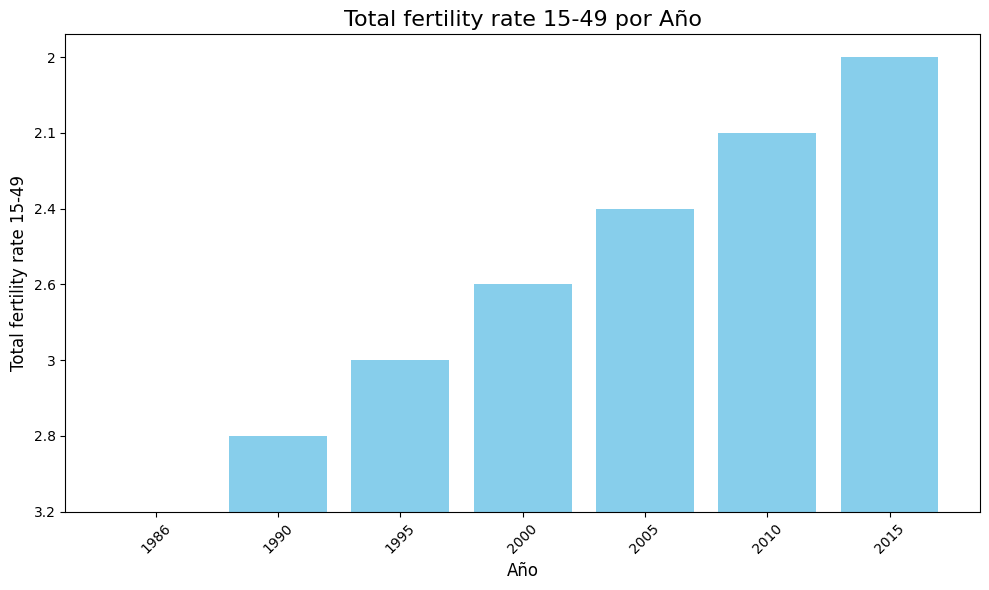

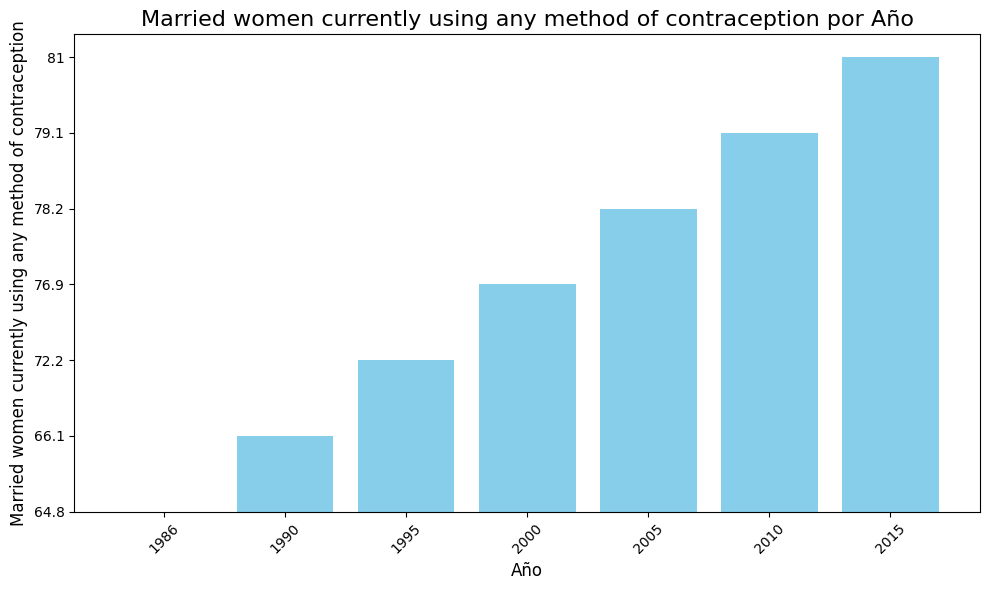

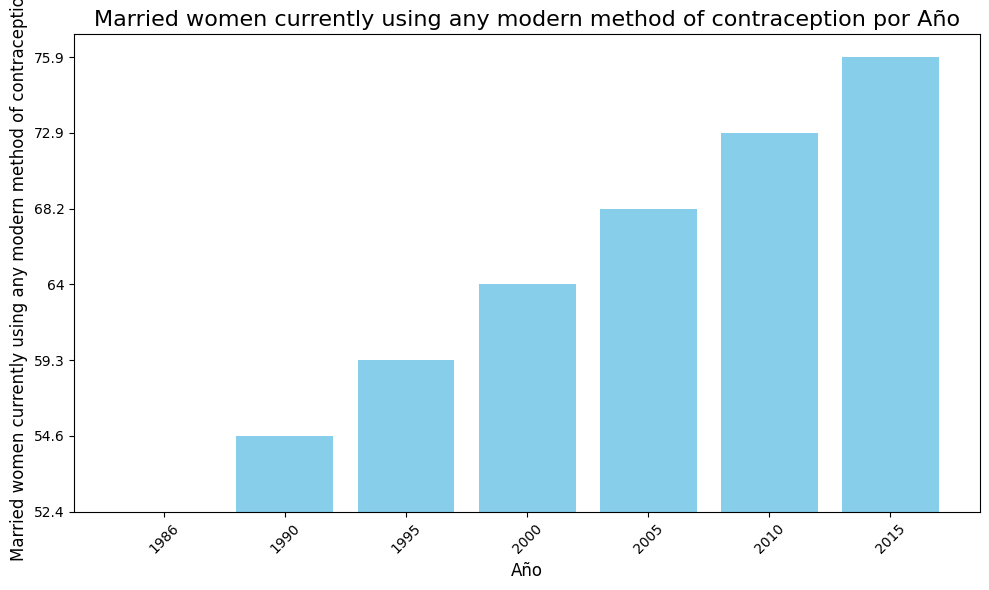

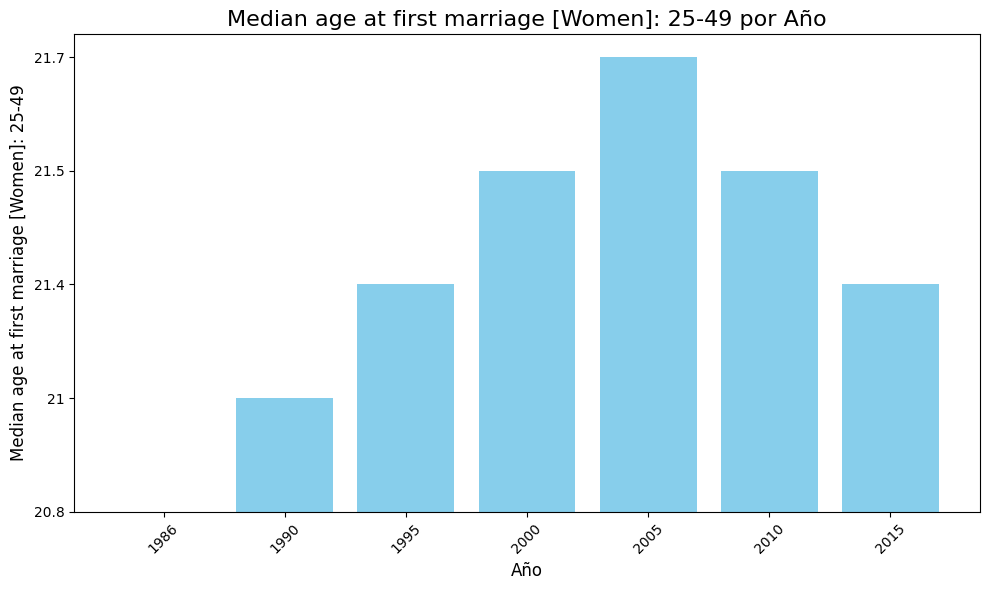

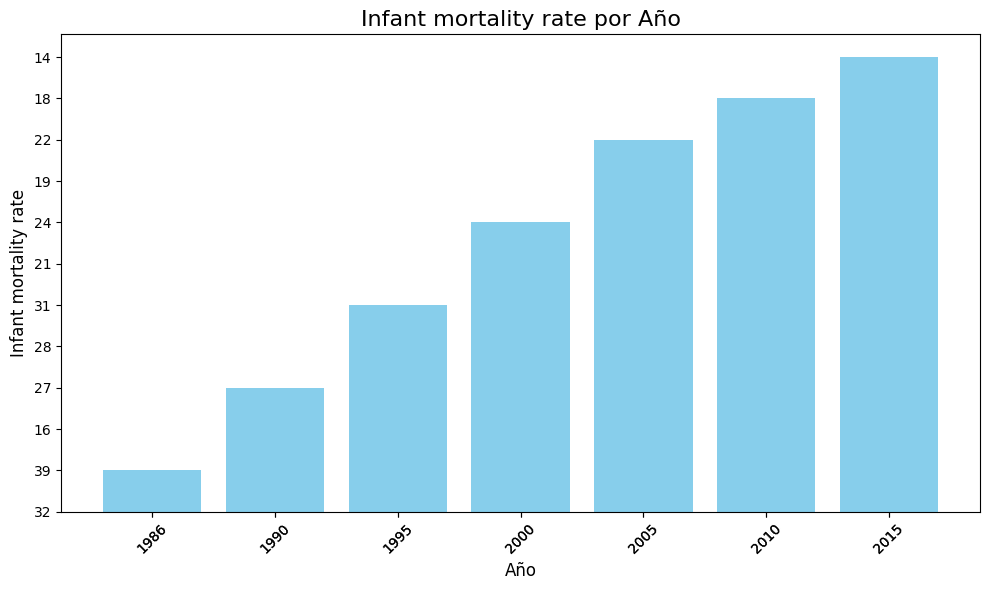

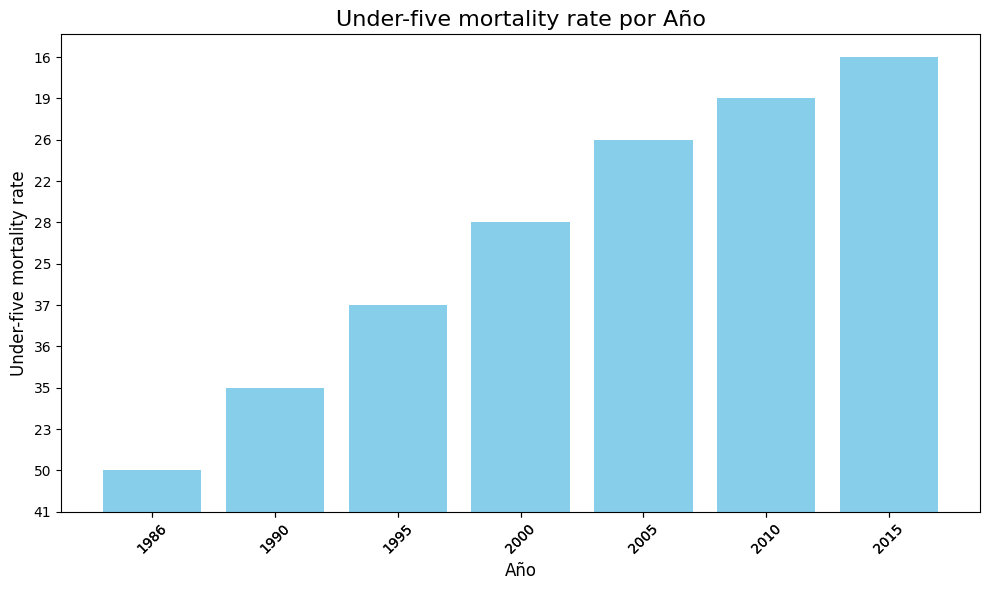

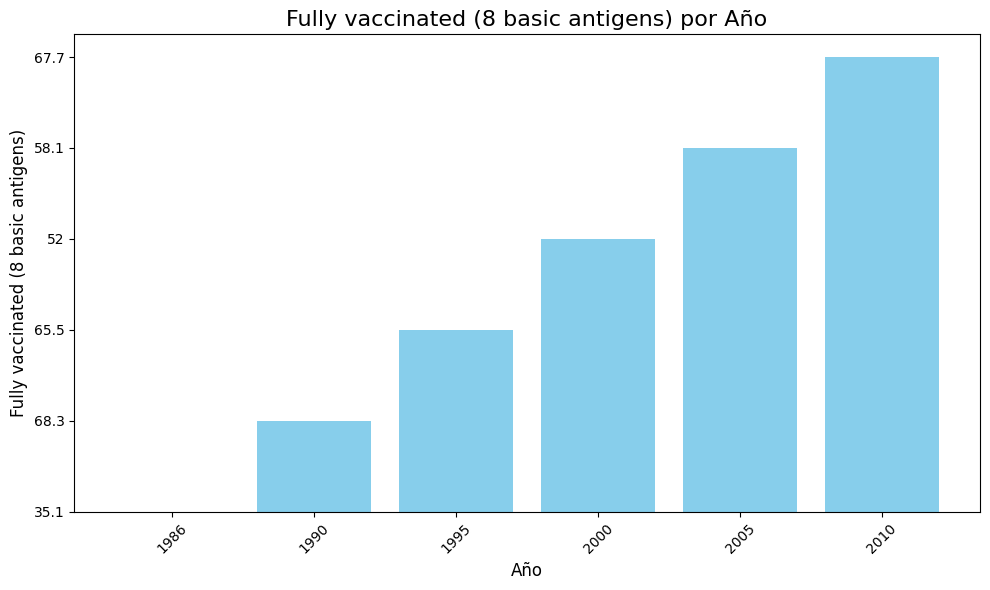

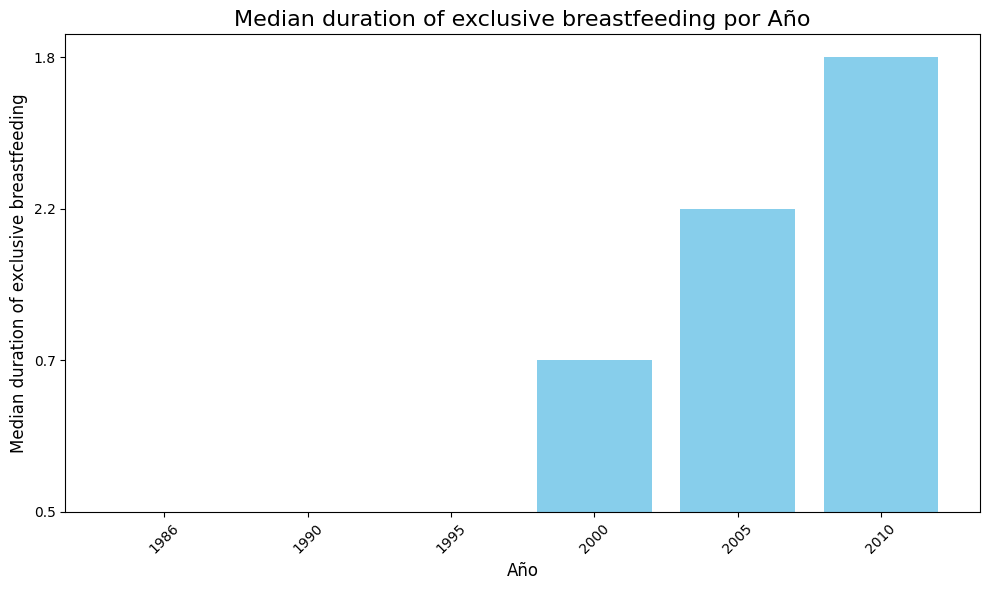

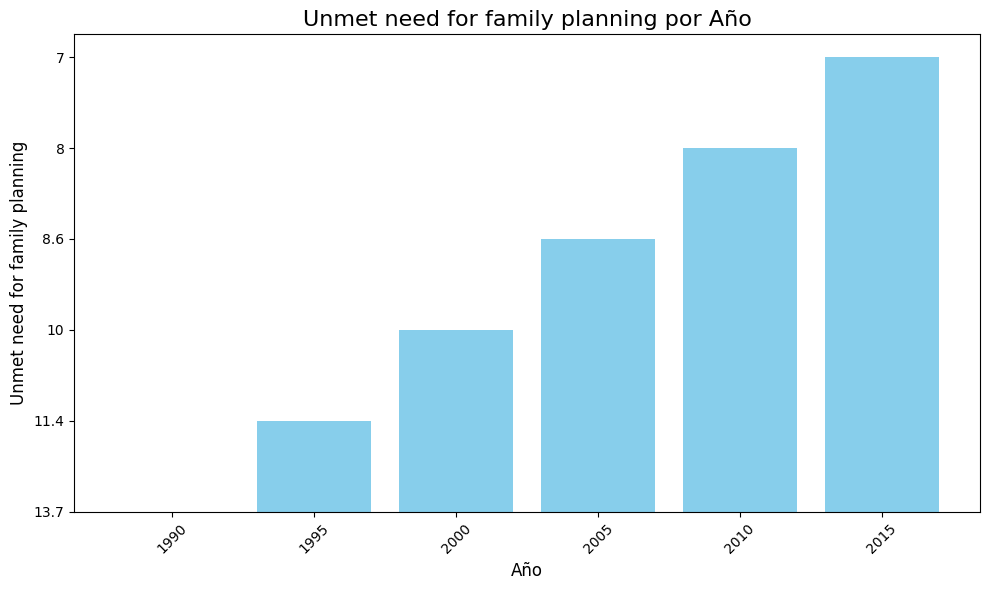

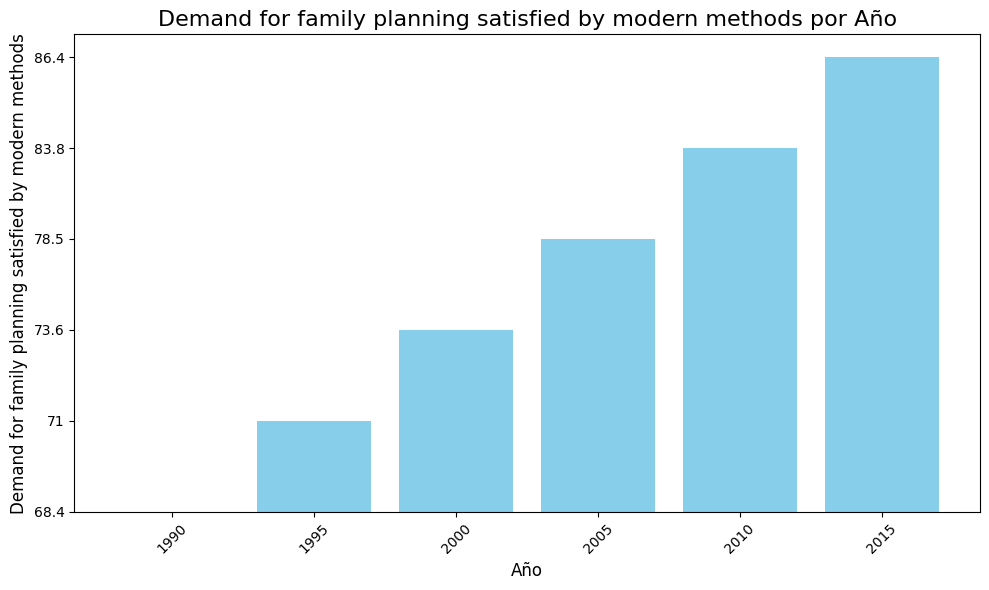

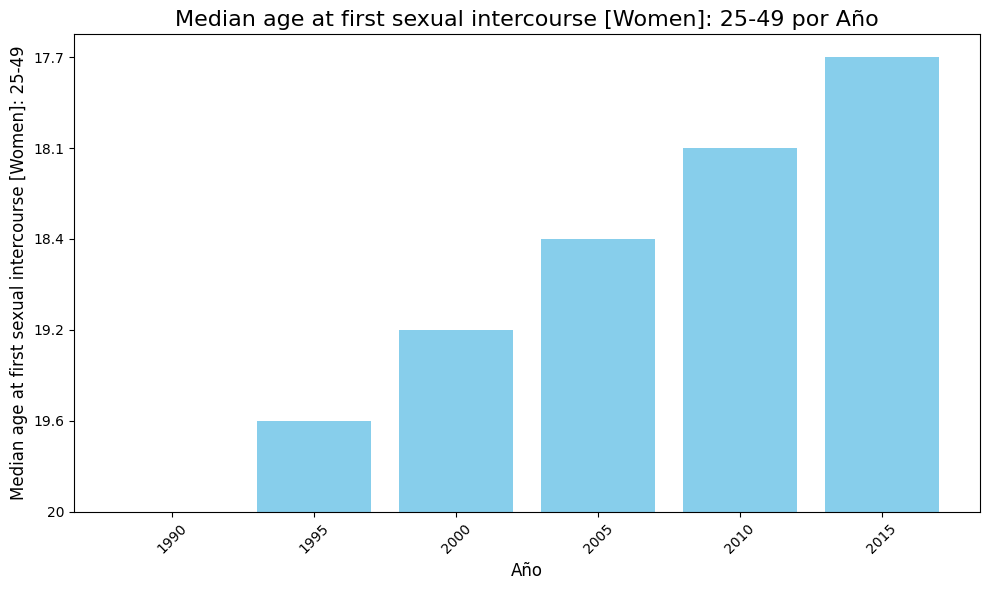

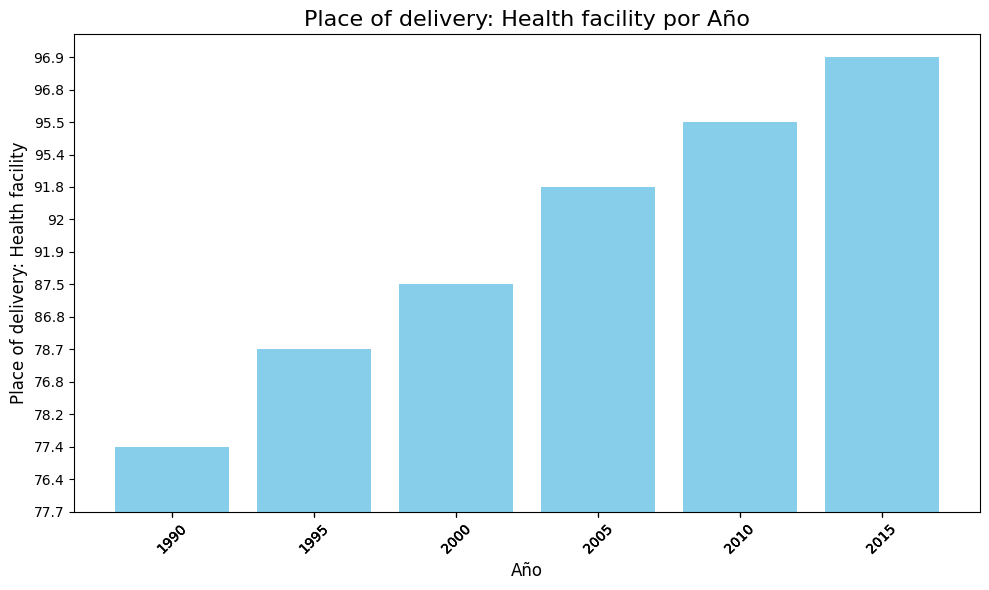

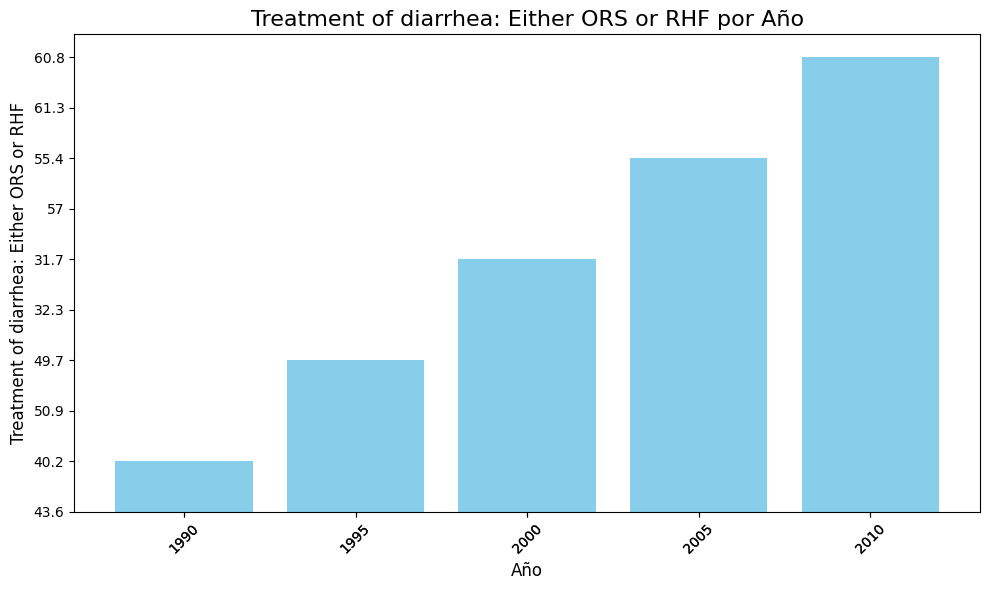

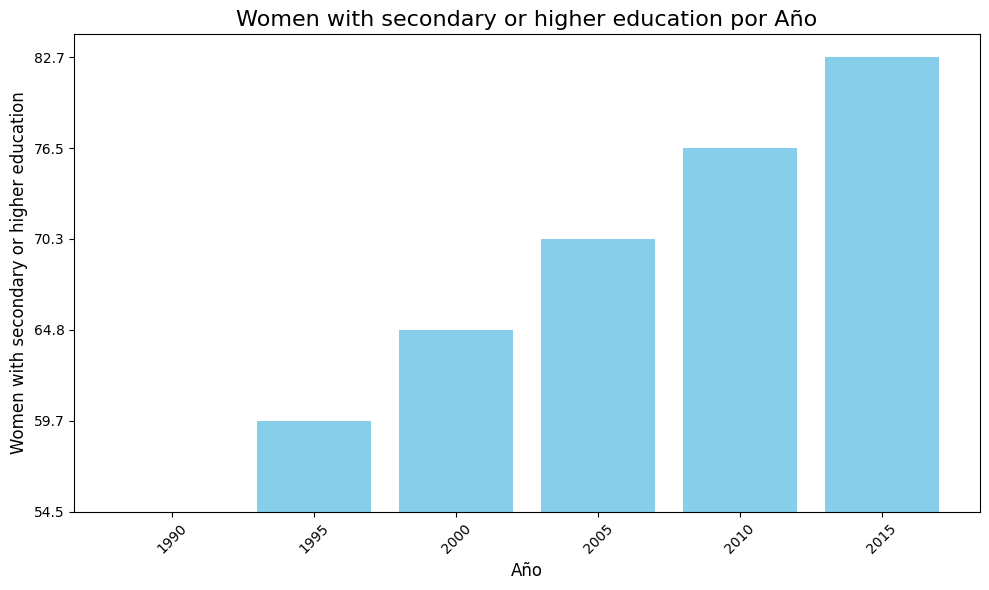

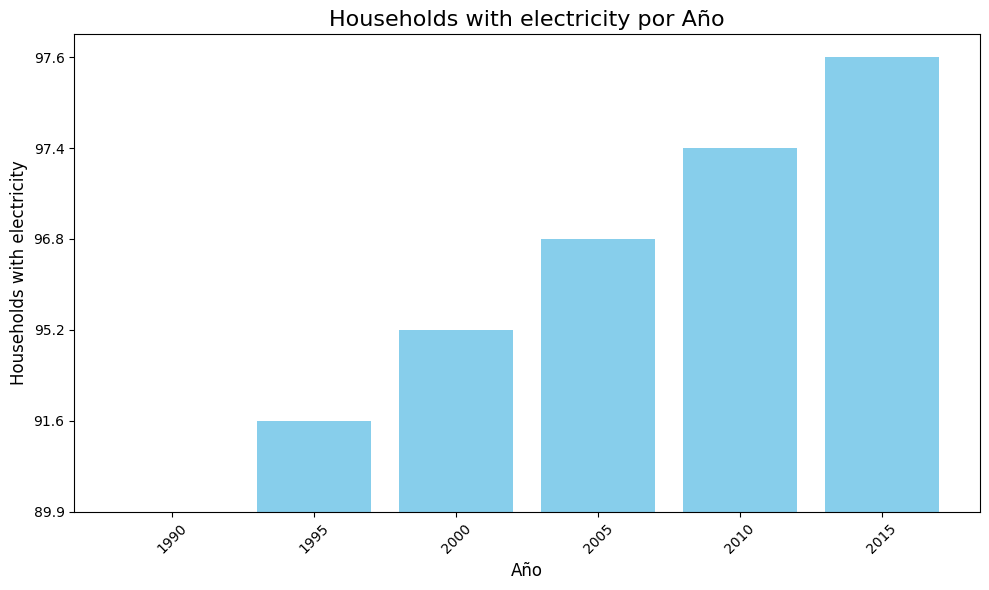

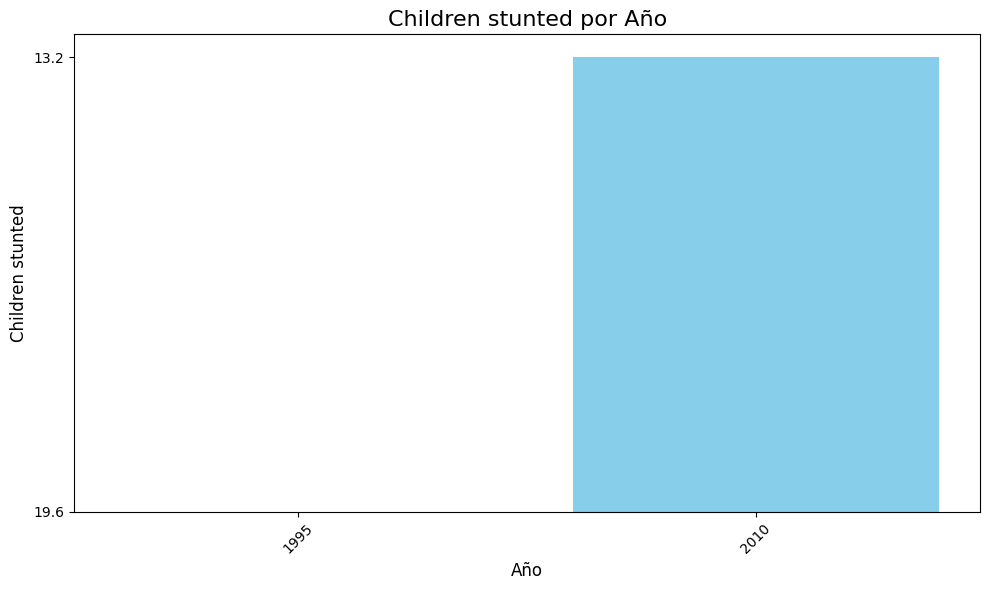

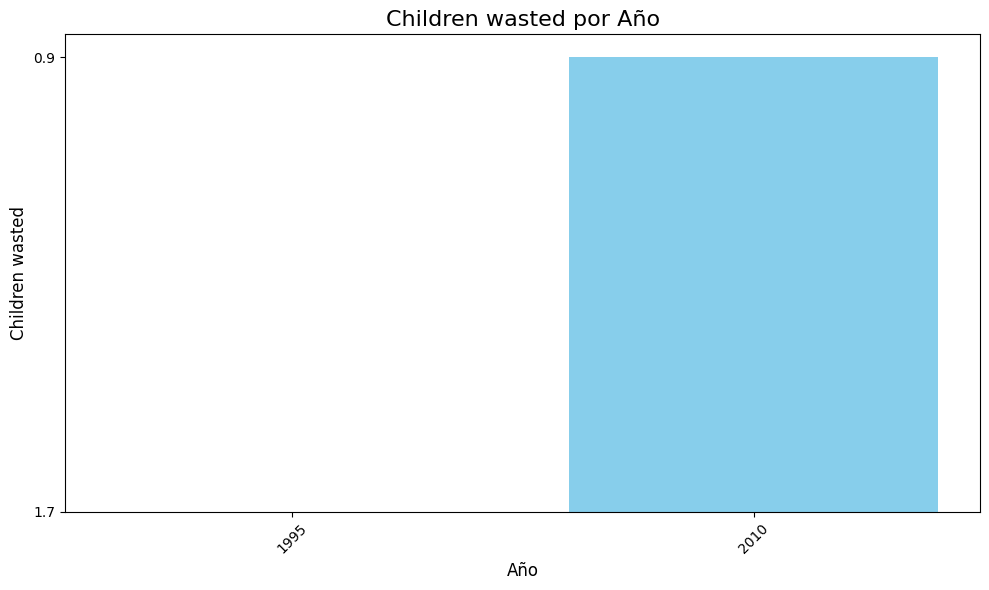

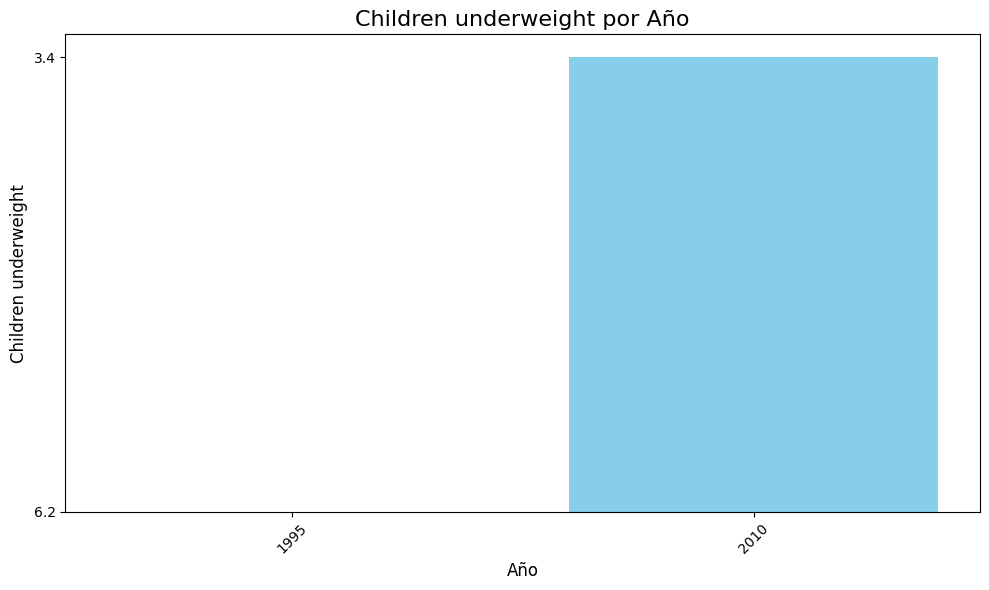

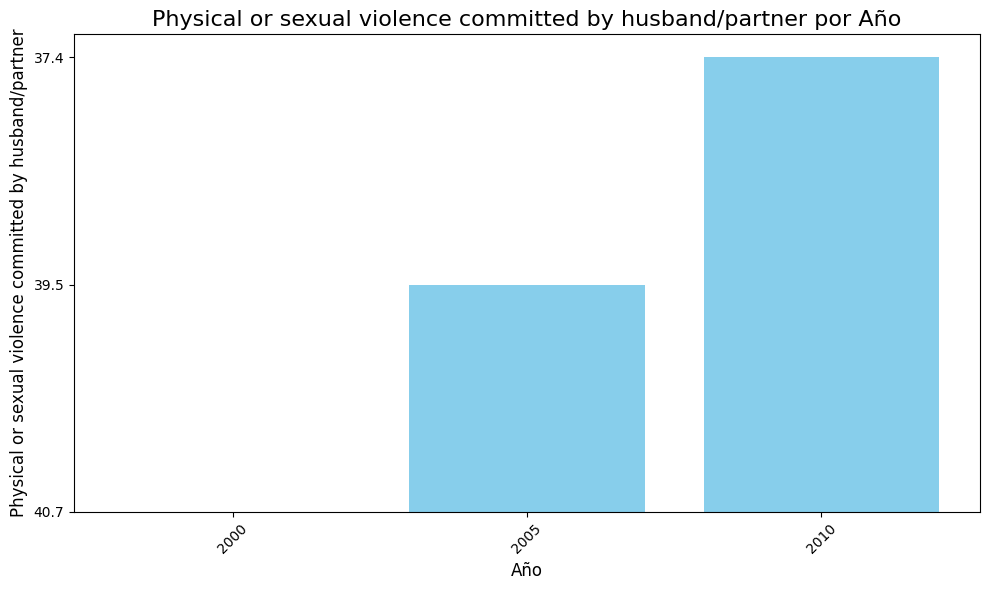

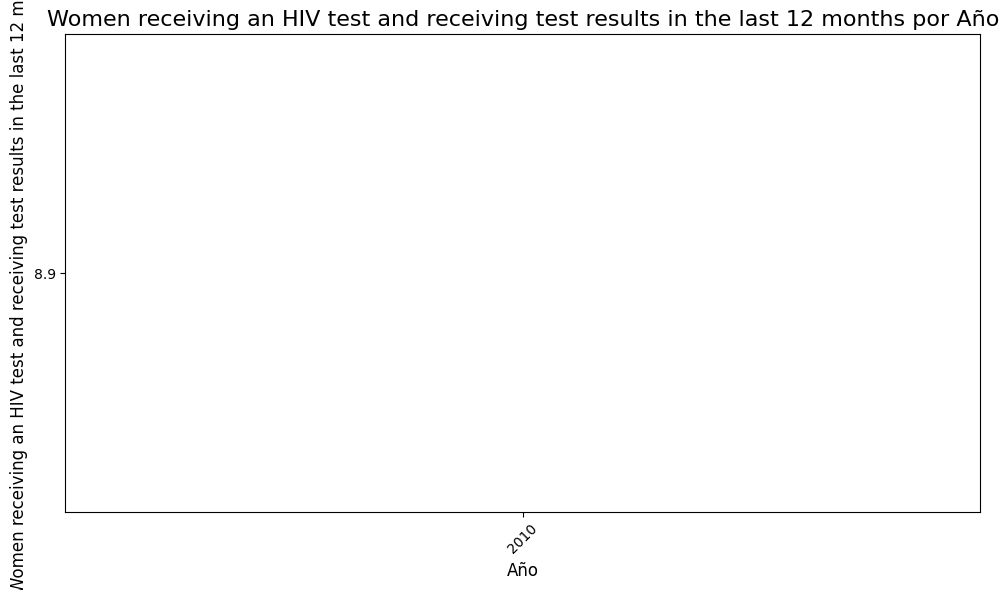

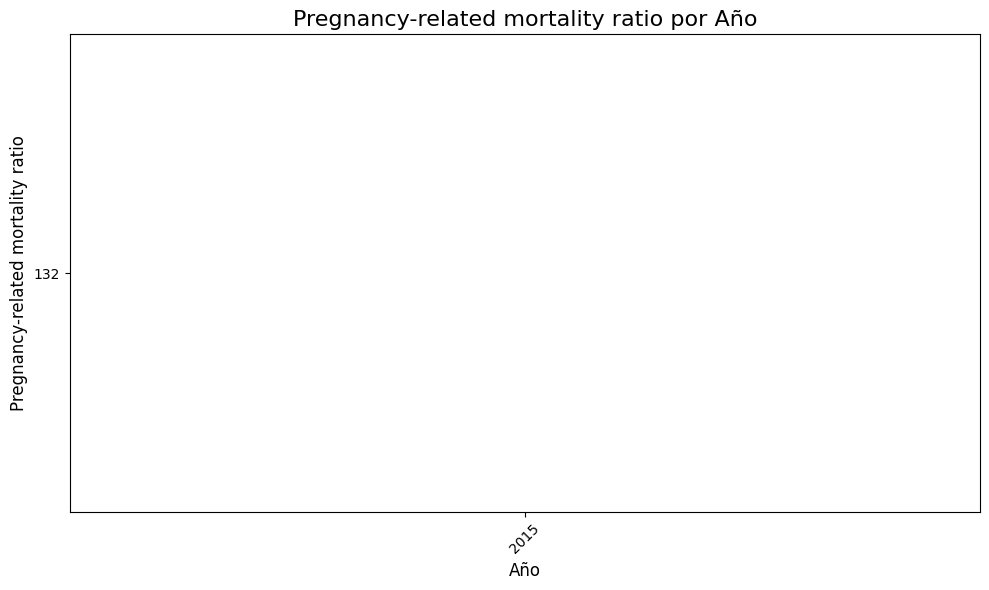

In [23]:
graficos = []

for indicador in indicadores:
    indicadoresfilt = DHS[DHS['Indicator'] == indicador]
    
    plt.figure(figsize=(10,6))
    plt.bar(indicadoresfilt['SurveyYear'], indicadoresfilt['Value'], color='skyblue')
    
    plt.title(f'{indicador} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel(indicador, fontsize=12)
    
    plt.xticks(indicadoresfilt['SurveyYear'], rotation=45)
    plt.tight_layout()
    
    graficos.append(plt.gcf())

for grafico in graficos:
    grafico.show()